<a href="https://colab.research.google.com/github/EstevamHenrique/Portifolio1/blob/main/Previs%C3%A3o_de_Inadimpl%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregando dados!**

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('credit_data.csv')

In [3]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
dataset.dropna(inplace=True)
dataset.shape


(1997, 5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


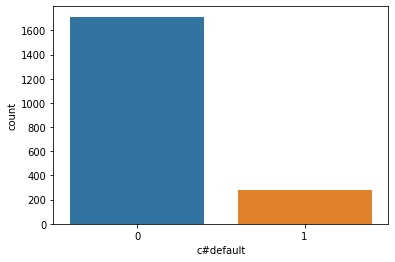

In [6]:
import seaborn as sns
sns.countplot(dataset['c#default']);

In [9]:
X = dataset.iloc[:, 1:4].values
Y = dataset.iloc[:, 4].values

In [10]:
X.shape, Y.shape

((1997, 3), (1997,))

# **Base de treinamento e teste**

In [12]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y, test_size = 0.2, stratify= Y)

In [13]:
X_treinamento.shape, Y_treinamento.shape

((1597, 3), (1597,))

In [14]:
X_teste.shape, Y_teste.shape

((400, 3), (400,))

In [16]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [17]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [18]:
np.unique(Y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [19]:
1371 / len(Y_treinamento), 226/ len(Y_treinamento)

(0.8584846587351284, 0.14151534126487164)

# **Classificação com Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, Y_treinamento)


RandomForestClassifier()

In [105]:
previsoes = modelo.predict(X_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [106]:
Y_teste

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(previsoes, Y_teste)

0.985

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
cm = confusion_matrix(previsoes, Y_teste)
cm

array([[340,   3],
       [  3,  54]])

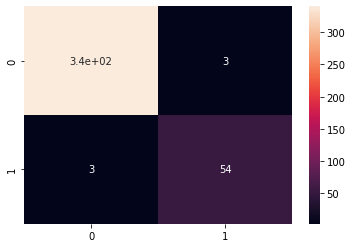

In [111]:
sns.heatmap(cm, annot=True);

In [117]:
(340 + 3) / (340 + 3 + 3 + 54)

0.8575

In [118]:
# Percentual de acerto para as pessoas que pagam emprestimo
340 / (340 + 3)

0.9912536443148688

In [119]:
#percentual de acerto para as pessoas que não pagam emprestimo
54 / (54 + 3)

0.9473684210526315

In [129]:
# ex: vamos supor que para cada cliente que não paga o emprestimo o banco tenha um prejuizo médio de R$5000
#Lista de cliente não pagadores é de 1000 clientes
1000 * 6 / 100

60.0

In [130]:
#prejuizo de mais de 1 milhão
60*5000

300000

# **Subamostragem(undersampling) - Tomek Links**
- Essa técnica é usada quando temos dados desbalanceados, ela diminui a quantidade de exemplos da classe majoritária, igualando a quantidade de dados das duas classe.

In [41]:
from imblearn.under_sampling import TomekLinks

In [51]:
tl = TomekLinks(sampling_strategy='majority')

In [57]:
x_under, y_under = tl.fit_resample(X, Y)

In [58]:
x_under.shape, y_under.shape

((1897, 3), (1897,))

In [59]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [60]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [61]:
x_treinamento_u, x_teste_u, y_treinamento_u, y_teste_u = train_test_split(x_under, y_under, test_size=0.2, stratify= y_under)

In [62]:
x_treinamento_u.shape, x_teste_u.shape

((1517, 3), (380, 3))

In [120]:
modelo_u = RandomForestClassifier()
modelo_u.fit(x_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(x_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9947368421052631

In [121]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[322,   1],
       [  1,  56]])

In [123]:
322 / (322 + 1)

0.9969040247678018

In [124]:
56 / (56 + 1)

0.9824561403508771

# **Oversampling**
- os algoritmos fazem calculos de similaridade e preenchem a classe minoritária com registros sintéticos completando assim as informações faltantes.

In [69]:
from imblearn.over_sampling import SMOTE

In [71]:
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(X, Y)

In [72]:
x_over.shape, y_over.shape

((3428, 3), (3428,))

In [73]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [74]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [75]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split(x_over, y_over, test_size=0.2, stratify= y_over)

In [76]:
x_treinamento_o.shape, x_teste_o.shape

((2742, 3), (686, 3))

In [80]:
#80% dados para o treinamento
2742 / (2742 + 686)

0.7998833138856476

In [81]:
#20% dados para o teste
686 / (2742 + 686)

0.2001166861143524

In [125]:
modelo_over = RandomForestClassifier()
modelo_over.fit(x_treinamento_o, y_treinamento_o)
previsoes_o = modelo_over.predict(x_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9912536443148688

In [126]:
cm_over = confusion_matrix(previsoes_o, y_teste_o)
cm_over

array([[337,   0],
       [  6, 343]])

In [127]:
337 / (337 + 0)

1.0

In [128]:
343 / (343 + 6)

0.9828080229226361

In [89]:
#Perca por cliente não pagador = 5.000
#Total de Clientes não pagadores = 1.000
1000 * 2 /100

20.0

In [90]:
20*5000

100000

In [131]:
300000 - 100000

200000

Usando a técnica do oversampling conseguimos diminuir o prejuizo do banco em R$200.000